In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train'
valid_path = 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Test'

In [3]:
# useful for getting number of output classes
folders = glob('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train/*')

In [4]:
folders

['C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train\\1Hundrednote',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train\\2Hundrednote',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train\\2Thousandnote',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train\\5Hundrednote',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train\\Fiftynote',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train\\Tennote',
 'C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train\\Twentynote']

In [15]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [16]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [19]:
test_set = test_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [20]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 9.1315 - accuracy: 0.1176 

D:\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 5s 1s/step - loss: 9.1315 - accuracy: 0.1176 - val_loss: 3.3084 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 5s 1s/step - loss: 2.3602 - accuracy: 0.1438 - val_loss: 1.9818 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 5s 1s/step - loss: 1.9543 - accuracy: 0.1895 - val_loss: 1.9302 - val_accuracy: 0.1667
Epoch 4/50
5/5 [==============================] - 5s 994ms/step - loss: 1.9337 - accuracy: 0.1634 - val_loss: 1.8783 - val_accuracy: 0.2143
Epoch 5/50
5/5 [==============================] - 5s 975ms/step - loss: 1.8729 - accuracy: 0.2876 - val_loss: 1.7773 - val_accuracy: 0.2857
Epoch 6/50
5/5 [==============================] - 5s 953ms/step - loss: 1.7916 - accuracy: 0.2810 - val_loss: 1.7543 - val_accuracy: 0.3571
Epoch 7/50
5/5 [==============================] - 5s 1s/step - loss: 1.7483 - accuracy: 0.3529 - val_loss: 1.6608 - val_accuracy: 0.3810
Epoch 8/50
5/5 [===========================

In [21]:
r.history

{'loss': [9.13146686553955,
  2.360239267349243,
  1.954251766204834,
  1.9337197542190552,
  1.8729044198989868,
  1.7916144132614136,
  1.748288631439209,
  1.6226903200149536,
  1.472517967224121,
  1.3693310022354126,
  1.316243290901184,
  1.1239560842514038,
  0.9751037359237671,
  0.9733523726463318,
  0.8788268566131592,
  0.7530002593994141,
  0.683651864528656,
  0.5705617070198059,
  0.5507097244262695,
  0.49607938528060913,
  0.5336799025535583,
  0.7625061273574829,
  0.6568949818611145,
  0.5581163167953491,
  0.42601102590560913,
  0.39541757106781006,
  0.3497285842895508,
  0.3080008625984192,
  0.297343373298645,
  0.28419047594070435,
  0.3187050521373749,
  0.24578483402729034,
  0.2115161418914795,
  0.21700546145439148,
  0.1719338595867157,
  0.16034431755542755,
  0.15051566064357758,
  0.15552105009555817,
  0.1424737274646759,
  0.10495441406965256,
  0.1328161209821701,
  0.10971185564994812,
  0.10245513916015625,
  0.11701207607984543,
  0.1357704102993011

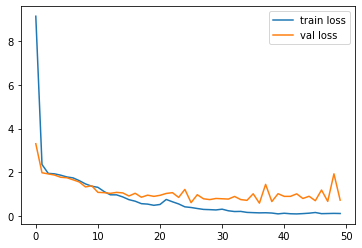

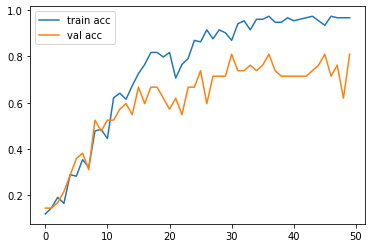

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [26]:
y_pred = Classifier.predict(test_set)

D:\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [27]:
y_pred

array([[1.54952886e-08, 1.48733154e-01, 3.92441734e-06, 7.06659222e-04,
        5.83588474e-07, 8.24966609e-01, 2.55890023e-02],
       [6.56544983e-01, 3.04698106e-02, 1.13279551e-01, 1.78582013e-01,
        1.96539145e-02, 1.31985627e-03, 1.49913030e-04],
       [4.73314434e-01, 1.46178172e-08, 8.68385752e-10, 1.74508232e-03,
        5.17580688e-01, 2.88498040e-06, 7.35692540e-03],
       [1.67271474e-09, 1.61351090e-05, 1.29450268e-06, 3.89754023e-05,
        4.62208703e-07, 9.99487519e-01, 4.55639965e-04],
       [2.56147295e-15, 9.99958277e-01, 4.11306995e-11, 4.73060851e-07,
        5.84491982e-13, 3.91363355e-05, 2.17466072e-06],
       [4.78215334e-08, 1.13009615e-03, 1.34893838e-07, 1.32550520e-06,
        5.24679422e-07, 5.09602427e-01, 4.89265442e-01],
       [1.16224321e-07, 1.70615260e-02, 7.99535485e-07, 8.57483974e-06,
        2.28615386e-06, 2.97684669e-02, 9.53158200e-01],
       [7.54232425e-03, 8.91129332e-07, 7.44681847e-06, 9.02806580e-01,
        5.29640645e-04, 5

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([5, 0, 4, 5, 1, 5, 6, 3, 5, 0, 2, 2, 4, 1, 1, 1, 1, 4, 2, 2, 5, 1,
       1, 2, 4, 4, 3, 4, 0, 2, 1, 6, 3, 5, 5, 4, 4, 0, 2, 5, 6, 4],
      dtype=int64)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('model_Classifier.h5')

In [47]:
img=image.load_img('C:/Users/gaurav sahani/Desktop/Deep Learning Projects/Indian Currency Classifier/Datasets/Train/Tennote/4.jpg',target_size=(224,224))

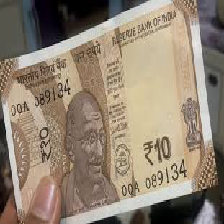

In [48]:
img

In [49]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [50]:
result = Classifier.predict(test_image)
result

array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [51]:
a=np.argmax(model.predict(test_image), axis=1)

In [54]:
a==5

array([ True])